In [34]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from PIL import Image
import os
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [24]:
df = pd.read_csv('../data/HAM10000_metadata.csv')
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [25]:
lesion_type = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

imageid_path = {os.path.splitext(os.path.basename(x))[0]: x
                for x in glob(os.path.join("..\\data", '*', '*.jpg'))}

In [26]:
df['path'] = df['image_id'].map(imageid_path.get)
df['cell_type'] = df['dx'].map(lesion_type.get)
df['target'] = pd.Categorical(df['cell_type']).codes

In [27]:
df.head().path

0    ..\data\HAM10000\ISIC_0027419.jpg
1    ..\data\HAM10000\ISIC_0025030.jpg
2    ..\data\HAM10000\ISIC_0026769.jpg
3    ..\data\HAM10000\ISIC_0025661.jpg
4    ..\data\HAM10000\ISIC_0031633.jpg
Name: path, dtype: object

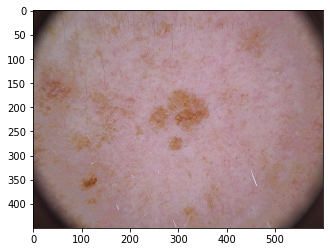

In [32]:
img = mpimg.imread(df.path[900])
imgplot = plt.imshow(img)

In [ ]:
df